In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img = cv2.imread('/Users/ritesh/Animal_Recongnition/Model/datasets/ross/bob.jpg')
img.shape

(225, 224, 3)

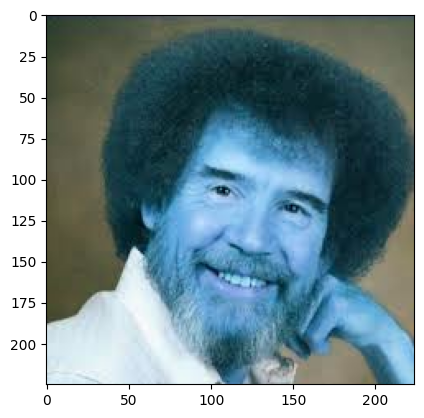

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[ 52,  57,  61, ...,  90,  90,  90],
       [ 57,  56,  55, ...,  90,  90,  90],
       [ 61,  55,  51, ...,  91,  90,  90],
       ...,
       [225, 228, 232, ..., 211, 212, 212],
       [231, 233, 237, ..., 210, 211, 211],
       [236, 236, 237, ..., 205, 208, 212]], dtype=uint8)

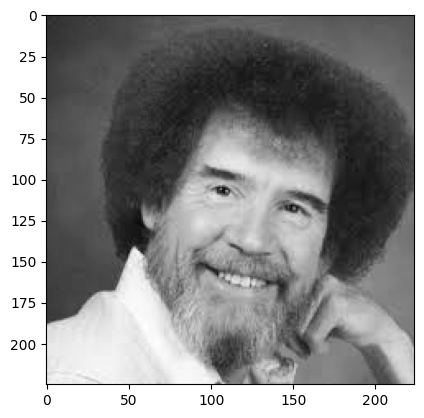

In [5]:
plt.imshow(gray, cmap='gray')


In [6]:
face_cascade = cv2.CascadeClassifier('/Users/ritesh/Animal_Recongnition/Model/open_cv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/ritesh/Animal_Recongnition/Model/open_cv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.2,10)
faces

array([[ 61,  60, 130, 130]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(61, 60, 130, 130)

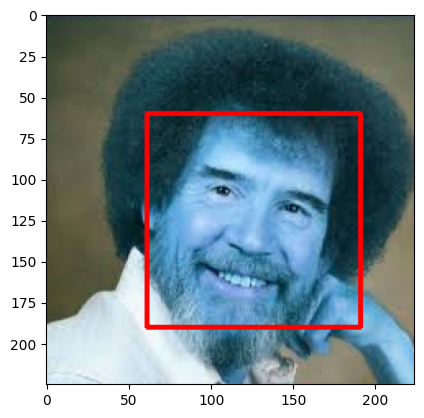

In [8]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

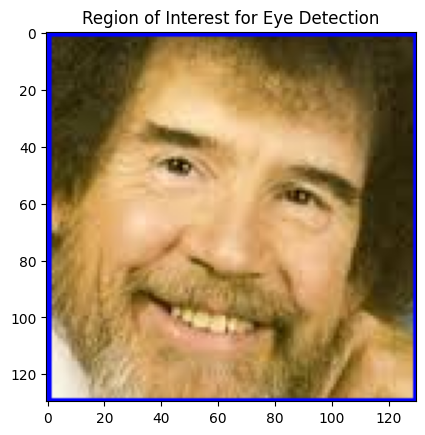

Detected eyes: [[76 47 25 25]
 [26 24 44 44]]


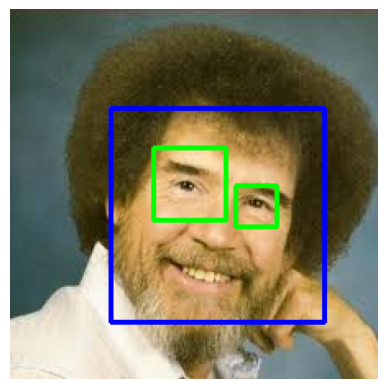

In [11]:
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        
        # Define the region of interest (ROI) for eyes within the detected face
        roi_gray = gray[y:y + h, x:x + w]  # ROI for eyes in grayscale
        roi_color = img[y:y + h, x:x + w]  # ROI for eyes in color

        # Optionally, visualize the ROI
        plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
        plt.title("Region of Interest for Eye Detection")
        plt.show()
        
        # Preprocess ROI (e.g., histogram equalization)
        roi_gray = cv2.equalizeHist(roi_gray)

        # Detect eyes within the face ROI
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
        print("Detected eyes:", eyes)
        
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        
    # Display the result
    plt.figure()
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    plt.axis('off') 
    plt.show()
    
# Clean up
cv2.destroyAllWindows()

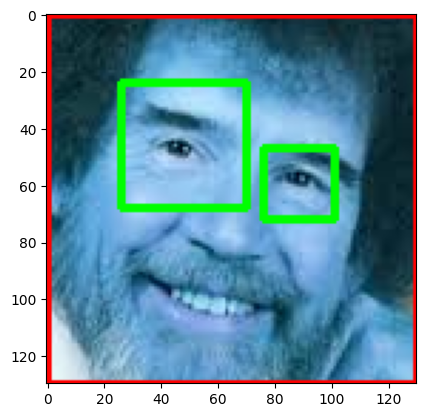

In [12]:
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color


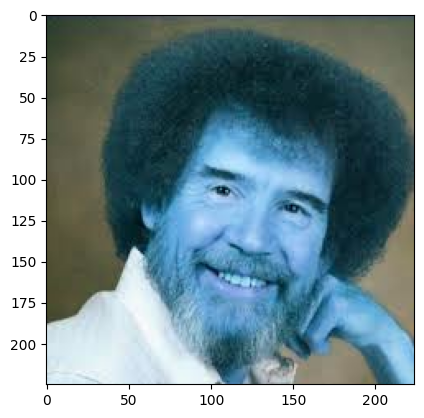

In [14]:
original_image = cv2.imread('/Users/ritesh/Animal_Recongnition/Model/test_img/bob.jpg')
plt.imshow(original_image)

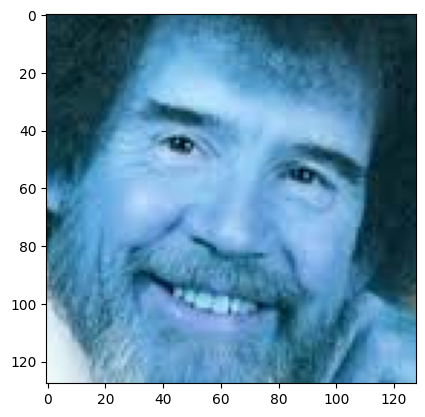

In [15]:
cropped_image = get_cropped_image_if_2_eyes('/Users/ritesh/Animal_Recongnition/Model/test_img/bob.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data = "/Users/ritesh/Animal_Recongnition/Model/datasets/"
path_to_cropped_data = "/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/"

In [30]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [31]:
img_dirs

['/Users/ritesh/Animal_Recongnition/Model/datasets/musk',
 '/Users/ritesh/Animal_Recongnition/Model/datasets/kobe',
 '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped',
 '/Users/ritesh/Animal_Recongnition/Model/datasets/trump',
 '/Users/ritesh/Animal_Recongnition/Model/datasets/ross']

In [32]:
import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [48]:
import os

img_dir = '/Users/ritesh/Animal_Recongnition/Model/datasets/ross'
for entry in os.scandir(img_dir):
    if entry.is_file():
        print(entry.path)

/Users/ritesh/Animal_Recongnition/Model/datasets/ross/bob.jpg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/ergwer.jpg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/.DS_Store
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/rebker.jpeg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/ebr.jpeg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/ewvwe.jpg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/grewobe.jpg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/efwvwe.jpg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/ve.jpeg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/ref.jpeg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/owrego.jpg
/Users/ritesh/Animal_Recongnition/Model/datasets/ross/ber.jpeg


In [50]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/efw32.jpeg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/erthy.jpeg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/qd fw.jpeg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/wef  we.jpeg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/asd.jpeg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/wefteh.jpg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/ewrb.jpeg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/as.jpg
Image loaded successfully
Processing image: /Users/ritesh/Animal_Recongnition/Model/datasets/musk/awd.jpeg
Image loaded successfully
Processing image: /Users/r

In [51]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

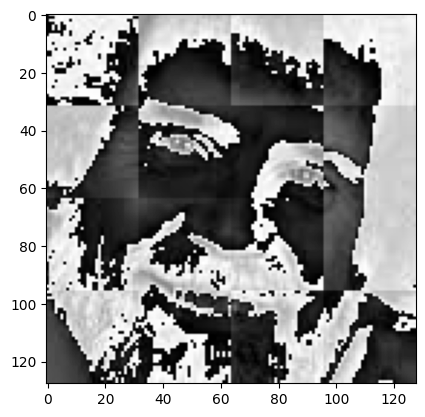

In [52]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [53]:
celebrity_file_names_dict

{'musk': ['/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk1.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk2.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk3.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk4.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk5.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk6.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk7.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk8.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk9.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk10.png',
  '/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/musk/musk11.png'],
 'kobe': [],
 'cropped': [],
 'trump': [],
 'ross': ['/Users/ritesh/Animal_Recongnition/Model/datasets/cropped/ross/ross1.png',
  '/Users/rite

In [54]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'musk': 0, 'kobe': 1, 'cropped': 2, 'trump': 3, 'ross': 4}

In [55]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [56]:
len(X)

14

In [57]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(14, 4096)

In [58]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6666666666666666

In [60]:
print(classification_report(y_test, model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [63]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.833333,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.833333,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.800000,{'logisticregression__C': 1}


In [64]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [65]:
print(best_estimators['svm'].score(x_test,y_test))
print(best_estimators['random_forest'].score(x_test,y_test))
print(best_estimators['logistic_regression'].score(x_test,y_test))


0.6666666666666666
0.6666666666666666
1.0


In [66]:
best_clf = best_estimators['svm']


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[2, 0],
       [1, 0]])

In [68]:
class_dict

{'musk': 0, 'kobe': 1, 'cropped': 2, 'trump': 3, 'ross': 4}

In [69]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [70]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))